In [6]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [7]:
N = 51
xs, xe = -1.0, 2.0
ys, ye = -0.5, 0.5
x = numpy.linspace(xs, xe, N)
y = numpy.linspace(ys, ye, N)
X, Y = numpy.meshgrid(x, y)

In [8]:
x=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigma=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

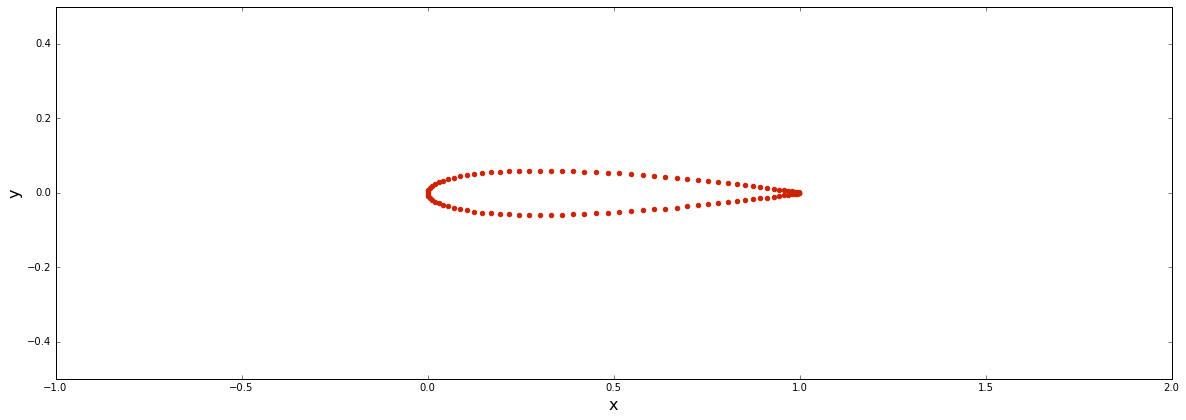

In [9]:
size = 20
pyplot.figure(figsize=(size,(ye-ys)/(xe-xs)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xs, xe)
pyplot.ylim(ys, ye)
pyplot.scatter(x, y, color='#CD2305')

In [10]:
u_inf =1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [11]:
def get_velocity(strength, xm, ym, X, Y):
    u = strength/(2*numpy.pi)*(X-xm)/((X-xm)**2+(Y-ym)**2)
    v = strength/(2*numpy.pi)*(Y-ym)/((X-xm)**2+(Y-ym)**2)
    return u, v

In [12]:
def get_stream_function(strength, xm, ym, X, Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ym), (X-xm))
    return psi

In [13]:
u_1 = 0
v_1 = 0
psi_1 = 0
for i in range(100):
    u_source, v_source = get_velocity(sigma[i], x[i], y[i], X, Y)
    psi_source = get_stream_function(sigma[i], x[i], y[i], X, Y)
    u_1 = u_1 + u_source
    v_1 = v_1 + v_source
    psi_1 = psi_1 + psi_source

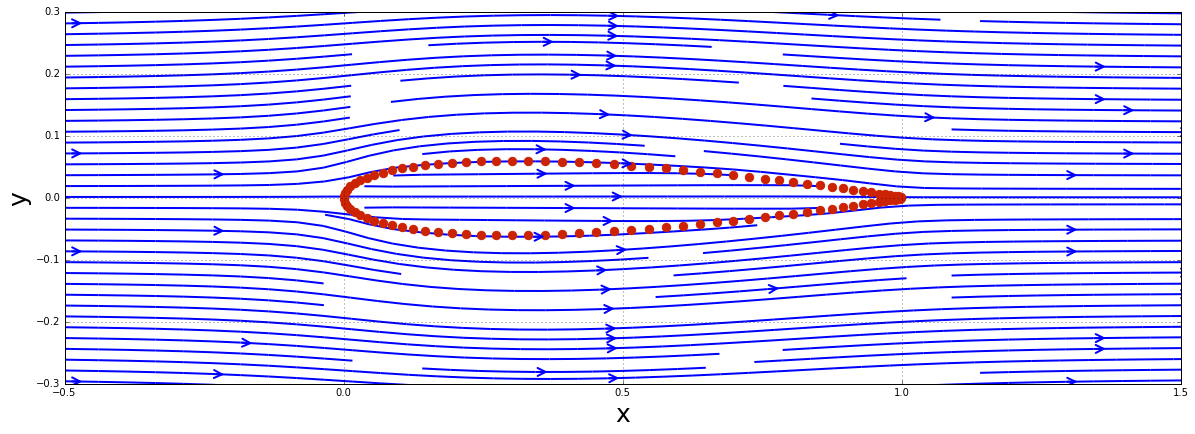

In [14]:
u = u_freestream + u_1
v = v_freestream + v_1
psi = psi_freestream + psi_1
size = 20
pyplot.figure(figsize=(size, (ye-ys)/(xe-xs)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=25)
pyplot.ylabel('y', fontsize=25)
pyplot.xlim(xs+0.5, xe-0.5)
pyplot.ylim(ys+0.2, ye-0.2)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=2, arrowsize=2, arrowstyle='->')
pyplot.scatter(x, y, color="#CD2305", s=70, marker='o')

25 16


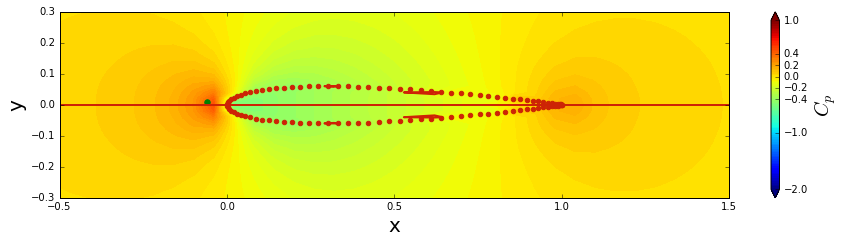

In [85]:
cp = 1.0 - (u**2 + v**2)/u_inf**2
size = 10
pyplot.figure(figsize=(1.5*size, (ye-ys)/(xe-xs)*size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.xlim(-0.5, 1.5)
pyplot.ylim(-0.3, 0.3)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=20)
cbar.set_ticks([-2.0, -1.0, -0.4, -0.2, 0, 0.2, 0.4, 1.0, 2.0])
pyplot.scatter(x, y, color='#CD2305', s=20, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');
print(numpy.argmax(cp)//N, numpy.argmax(cp)%N)
pyplot.scatter((xe-xs)/N*16+xs, ye-(ye-ys)/N*25, color='g', s=30, marker='o')
#i cannot figure out how to locate the precise coordinates of the maximum pressure 

In [53]:
?numpy.unravel_index 

In [40]:
? numpy.argmax


Object `` not found.
